In [2]:

from copulas.datasets import sample_bivariate_age_income

df = sample_bivariate_age_income()
df.head()

,age,income
0,48.935913,399.161393
1,39.234323,364.225531
2,55.659901,406.475105
3,31.810637,341.276022
4,65.342336,414.347815


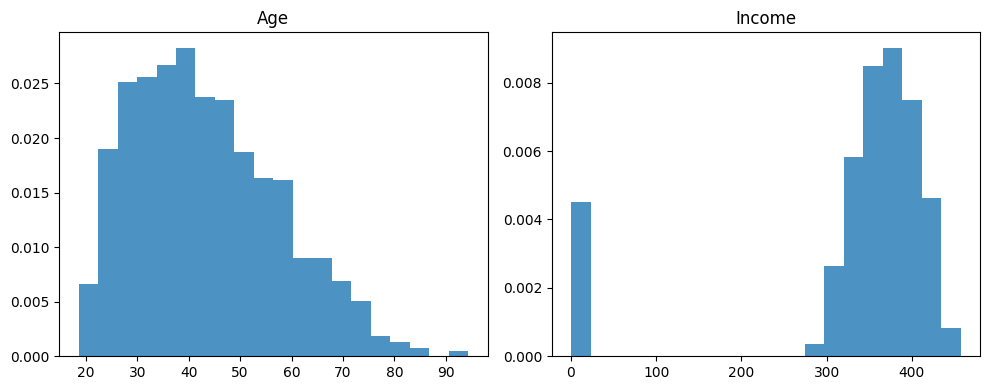

In [4]:
from copulas.visualization import hist_1d, side_by_side

side_by_side(hist_1d, {'Age': df['age'], 'Income': df['income']})

<Axes: xlabel='age', ylabel='income'>

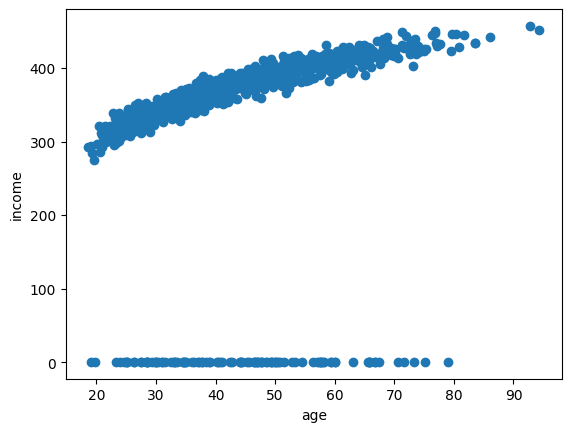

In [5]:
from copulas.visualization import scatter_2d

scatter_2d(df)

In [6]:
from copulas.multivariate import GaussianMultivariate

copula = GaussianMultivariate()
copula.fit(df)

/Users/ezratampubolon/PythonProjects/copula/.venv/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:5999: RuntimeWarning: divide by zero encountered in divide
  return c**2 / (c**2 - n**2)
/Users/ezratampubolon/PythonProjects/copula/.venv/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


In [57]:
df["prob"]=copula.probability_density(df)

In [60]:
df.query("prob<0.02")

,age,income,prob
9,50.009006,0.399177,0.005834
45,45.553205,0.391829,0.011729
62,46.967738,0.388391,0.009492
67,92.858688,457.172386,0.000648
70,46.871126,0.396291,0.009637
...,...,...,...
958,44.138510,0.364510,0.014333
965,19.752137,0.295913,0.006753
976,42.676726,0.366910,0.017468
977,20.014626,296.828711,0.006406


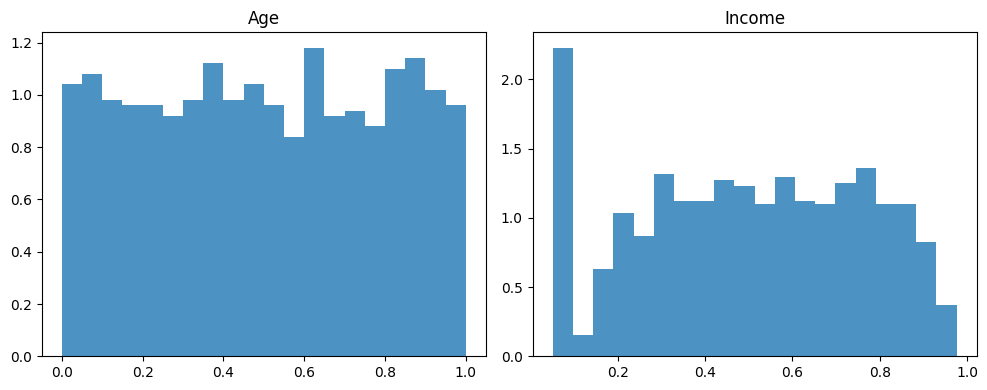

In [7]:
age_cdf = copula.univariates[0].cdf(df['age'])
inc_cdf = copula.univariates[1].cdf(df['income'])

side_by_side(hist_1d, {'Age': age_cdf, 'Income': inc_cdf})

In [9]:
synthetic = copula.sample(len(df))

In [10]:
synthetic

,age,income
0,30.321930,386.801165
1,33.582199,389.724696
2,44.507858,400.237666
3,33.632992,379.056647
4,65.100196,405.104474
...,...,...
995,36.947971,344.873917
996,46.643670,271.347779
997,34.221190,393.495447
998,64.139695,385.463343


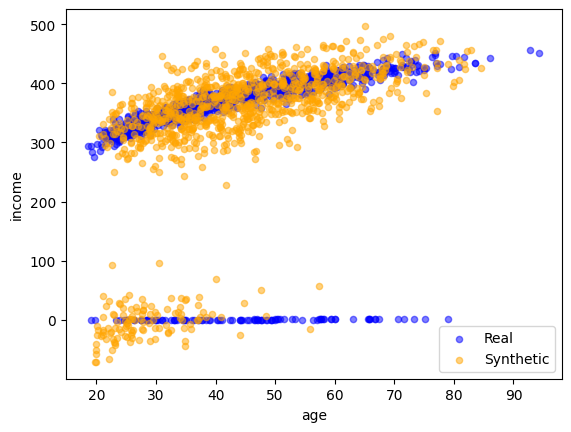

In [11]:

from copulas.visualization import compare_2d

compare_2d(df, synthetic)

In [22]:
import warnings

warnings.filterwarnings('ignore')
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

X,y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [31]:
fetch_california_housing(as_frame=True)["data"]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [23]:
import numpy as np

from copulas.multivariate import GaussianMultivariate

def create_synthetic(X, y):
    """
    This function combines X and y into a single dataset D, models it
    using a Gaussian copula, and generates a synthetic dataset S. It
    returns the new, synthetic versions of X and y.
    """
    dataset = np.concatenate([X, np.expand_dims(y, 1)], axis=1)

    model = GaussianMultivariate()
    model.fit(dataset)

    synthetic = model.sample(len(dataset))

    X = synthetic.values[:, :-1]
    y = synthetic.values[:, -1]

    return X, y

X_synthetic, y_synthetic = create_synthetic(X_train, y_train)

In [ ]:
from sklearn.linear_model import ElasticNet
model = ElasticNet()

In [48]:
model.fit(X_synthetic, y_synthetic)
print(f"Score train by synthetic: {model.score(X_test, y_test)}")

model.fit(X_train, y_train)
print(f"Score train by real data: {model.score(X_test, y_test)}")

X_combined=np.concatenate((X_synthetic, X_train), axis=0)
y_combined=np.concatenate((y_synthetic, y_train), axis=0)
model.fit(X_combined, y_combined)
print(f"Score train by combined data: {model.score(X_test, y_test)}")

Score train by synthetic: 0.408510919578733
Score train by real data: 0.4258981666579603
Score train by combined data: 0.41747010761257375


In [53]:
from sklearn import svm

model = svm.SVR()
model.fit(X_synthetic, y_synthetic)
print(f"Train score train by synthetic: {model.score(X_synthetic, y_synthetic)}")
print(f"Score train by synthetic: {model.score(X_test, y_test)}")

model.fit(X_train, y_train)
print(f"Score train by real data: {model.score(X_test, y_test)}")

X_combined=np.concatenate((X_synthetic, X_train), axis=0)
y_combined=np.concatenate((y_synthetic, y_train), axis=0)
model.fit(X_combined, y_combined)
print(f"Score train by combined data: {model.score(X_test, y_test)}")


Train score train by synthetic: -0.022885958137225826
Score train by synthetic: -0.023643239682297867
Score train by real data: -0.025388078328710373
Score train by combined data: -0.0002887313644253098


In [51]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(max_depth=2, random_state=0)
model.fit(X_synthetic, y_synthetic)
print(f"Score train by synthetic: {model.score(X_test, y_test)}")

model.fit(X_train, y_train)
print(f"Score train by real data: {model.score(X_test, y_test)}")

X_combined=np.concatenate((X_synthetic, X_train), axis=0)
y_combined=np.concatenate((y_synthetic, y_train), axis=0)
model.fit(X_combined, y_combined)
print(f"Score train by combined data: {model.score(X_test, y_test)}")

Score train by synthetic: 0.4429911006942576
Score train by real data: 0.4621966831261064
Score train by combined data: 0.4546865323612217
